In [82]:
from copy import deepcopy
import numpy as np
import pandas as pd
import orangecontrib
import orangecontrib.conformal as cp
import Orange
import seaborn as sns
from Orange.data import Domain, ContinuousVariable, DiscreteVariable, StringVariable


In [2]:
np.random.seed(42)

In [3]:
# Import modified CSV into Orange Data Table
data = Orange.data.Table("../data/signal_with_header_for_orange.csv")

normalizer = Orange.preprocess.Normalizer(zero_based = True, norm_type = Orange.preprocess.Normalize.NormalizeBySpan)
ntab = normalizer(data)

In [4]:
# Not a proper train split test but good enough to try Orange functions
train=data[:-1]
test_instance=data[-1]


In [5]:
#Split data 2 to 1
train, test = next(cp.evaluation.RandomSampler(ntab,2,1))

#Make random forest and NN classifier 
rf = Orange.classification.RandomForestLearner(n_estimators=100)
nn = Orange.classification.NNClassificationLearner(max_iter=800)

#Create cp methods for each (inverse probability for the non-comformity)
ip_rf = cp.nonconformity.InverseProbability(rf)
ip_nn = cp.nonconformity.InverseProbability(nn)

#Create inductive classifiers
i_ip_rf = cp.classification.InductiveClassifier(ip_rf)
i_ip_nn = cp.classification.InductiveClassifier(ip_nn)

#Create cross classifiers
c_ip_rf = cp.classification.CrossClassifier(ip_rf, 5, train)
c_ip_nn = cp.classification.CrossClassifier(ip_nn,5, train)




In [6]:
#Is the .1 in the hyper parameter the probability for each guess?

#Random Forest
res_i_rf = cp.evaluation.run_train_test(i_ip_rf, 0.1, train, test)
res_c_rf = cp.evaluation.run_train_test(c_ip_rf, 0.1, train, test)

#NN
res_i_nn = cp.evaluation.run_train_test(i_ip_nn, 0.1, train, test)
res_c_nn = cp.evaluation.run_train_test(c_ip_nn, 0.1, train, test)

In [7]:
rf_i = [res_i_rf.accuracy(), res_i_rf.confidence(), res_i_rf.credibility(), res_i_rf.singleton_correct()]
rf_c = [res_c_rf.accuracy(), res_c_rf.confidence(), res_c_rf.credibility(), res_c_rf.singleton_correct()]
nn_i = [res_i_nn.accuracy(), res_i_nn.confidence(), res_i_nn.credibility(), res_i_nn.singleton_correct()]
nn_c = [res_c_nn.accuracy(), res_c_nn.confidence(), res_c_nn.credibility(), res_c_nn.singleton_correct()]

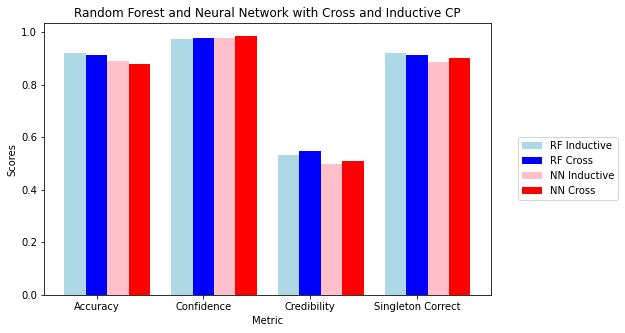

In [8]:
import matplotlib.pyplot as plt
import numpy as np
  

# create data
x = np.arange(4)
rf_i = [res_i_rf.accuracy(), res_i_rf.confidence(), res_i_rf.credibility(), res_i_rf.singleton_correct()]
rf_c = [res_c_rf.accuracy(), res_c_rf.confidence(), res_c_rf.credibility(), res_c_rf.singleton_correct()]
nn_i = [res_i_nn.accuracy(), res_i_nn.confidence(), res_i_nn.credibility(), res_i_nn.singleton_correct()]
nn_c = [res_c_nn.accuracy(), res_c_nn.confidence(), res_c_nn.credibility(), res_c_nn.singleton_correct()]

labs = ['Accuracy', 'Confidence', 'Credibility', 'Singleton Correct']
legend = ["RF Inductive", "RF Cross", "NN Inductive", "NN Cross"]
width = 0.2
  
plt.figure(figsize=(8, 5))
plt.bar(x-0.2, rf_i, width, color='lightblue')
plt.bar(x, rf_c, width, color='blue')
plt.bar(x+0.2, nn_i, width, color='pink')
plt.bar(x+0.4, nn_c, width, color='red')
plt.xticks(x, labs)
plt.xlabel("Metric")
plt.ylabel("Scores")
plt.legend(legend, bbox_to_anchor = (1.05, 0.6))
plt.title("Random Forest and Neural Network with Cross and Inductive CP")
plt.show()

In [9]:
print('Neural Network Accuracy:', res_nn.accuracy())
print('Neural Network Singleton Criterion:', res_nn.singleton_criterion())
print('Neural Network Empty:', res_nn.empty_criterion())

print('Neural Network Confidence:', res_nn.confidence())
# print('Neural Network Confusion:', res_nn.confusion())
print('Neural Network Multiple Criterion:', res_nn.multiple_criterion())
print('Neural Network Singleton Correct:', res_nn.singleton_correct())
print('Neural Network Credibility:', res_nn.credibility())

print("*************************")

print('Random Forest Accuracy:', res_rf.accuracy())
print('Random Forest Singleton Criterion:', res_rf.singleton_criterion())
print('Random Forest Empty:', res_rf.empty_criterion())

print('Random Forest Confidence:', res_rf.confidence())
# print('Random Forest Confusion:', res_rf.confusion())
print('Random Forest Multiple Criterion:', res_rf.multiple_criterion())
print('Random Forest Singleton Correct:', res_rf.singleton_correct())
print('Random Forest Credibility:', res_rf.credibility())





# r.accuracy()
# r.confidence()
# r.credibility()
# r.confusion(test, pred)
# r.multiple_criterion()
# r.singleton_criterion()
# r.empty_criterion()
# r.singleton_correct()





NameError: name 'res_nn' is not defined

In [ ]:
#Print results
print('Actual class:', test_instance.get_class())
print(ccp(test_instance, 0.1))
print(ccp(test_instance, 0.01))

In [35]:
ip_nn.nonconformity(data[4])

0.5890296746445594

In [41]:
df = preds_to_df(res_i_nn.preds) 

In [75]:
df = df.assign(ncs=[ip_nn.nonconformity(i) for i in test])
df = df.assign(race=[i[1] for i in test])

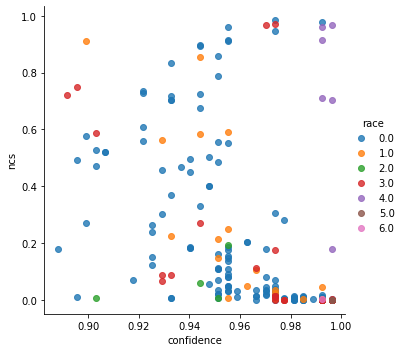

In [83]:
sns.lmplot(x='confidence', y='ncs', data=df, hue='race', fit_reg=False)


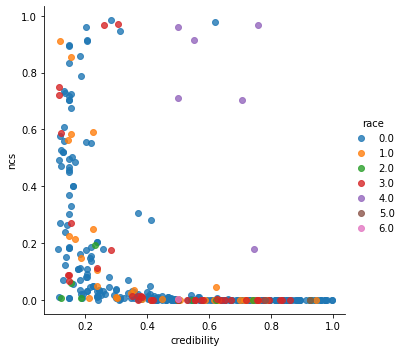

In [85]:
sns.lmplot(x='credibility', y='ncs', data=df, hue='race', fit_reg=False)


In [86]:
# x = df["confidence"]
# y = df["ncs"]

# plt.plot(x, y,  'o', color=df["race"]);
# plt.xlabel("Confidence")
# plt.ylabel("Non-conformity Score")

In [87]:
df['rank_conf'] = df['confidence'].rank()
df['rank_cred'] = df['credibility'].rank()
df['rank_ncs'] = df['ncs'].rank()

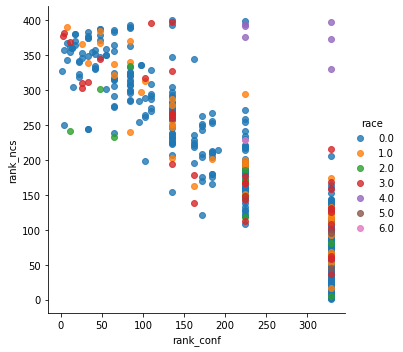

In [88]:
sns.lmplot(x='rank_conf', y='rank_ncs', data=df, hue='race', fit_reg=False)


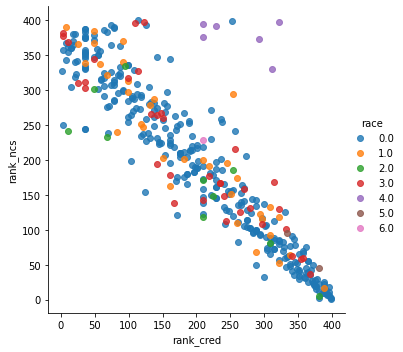

In [89]:
sns.lmplot(x='rank_cred', y='rank_ncs', data=df, hue='race', fit_reg=False)


Text(0, 0.5, 'Ranks of Non-conformity Score')

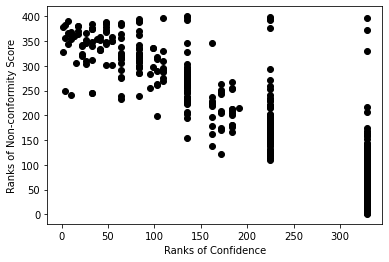

In [72]:
x = df["rank_conf"]
y = df["rank_ncs"]

plt.plot(x, y, 'o', color='black');
plt.xlabel("Ranks of Confidence")
plt.ylabel("Ranks of Non-conformity Score")

In [74]:
test

[[0.5588, 0, 99, 0.429, 0.0641, ... | 1] {170, 90},
 [0.3824, 0, 99, 0.429, 1.00, ... | 0] {754, 90},
 [0.4706, 1, 1, 0.571, 0.0513, ... | 0] {1170, 90},
 [0.5588, 3, 0, 0.286, 0.0769, ... | 1] {768, 90},
 [0.5294, 4, 1, 0.143, 1.00, ... | 1] {928, 90},
 ...
]

In [13]:



# #Split the Train and test dataset
# train, test = next(cp.evaluation.RandomSampler(ntab,2,1))

# #Call ML Orange SVM, Call conformal prediction tool, train model
# learner = Orange.classification.SVMLearner(probability = True)
# nc = cp.nonconformity.InverseProbability(learner)
# ic = cp.classification.InductiveClassifier(nc)
# r = cp.evaluation.run_train_test(ic, 0.03, train, test)

# #Print evaluation metrics for model
# multi = []
# for example, pred, ref in zip(test, r.preds, r.refs):
#     if len(pred.classes()) >= 2:
#         multi.append((example, pred.classes(), ref))
# print(r.accuracy(), len(multi))

In [37]:
import numpy as np
import pandas as pd
from sklearn import svm

import Orange
import orangecontrib.conformal as cp

# set NumPy seed for Orange3-Conformal reproducibility
np.random.seed(42)


def read_csv_to_table(filepath, normalize = True):
    tab = Orange.data.Table(filepath)
    if not normalize:
        return tab
    normalizer = Orange.preprocess.Normalizer(
            zero_based = True,
            norm_type = Orange.preprocess.Normalize.NormalizeBySpan)
    return normalizer(tab)


def pred_to_dict(pred):
    return {
        'classes': np.NaN if pred.eps == None else pred.classes(),
        'confidence': pred.confidence(),
        'credibility': pred.credibility(),
        'eps': pred.eps,
        'p': pred.p
    }


def preds_to_df(preds):
    return pd.DataFrame.from_records([pred_to_dict(x) for x in preds])


def result_to_dict(res):
    return {
        'accuracy': res.accuracy(),
        'confidence': res.confidence(),		
        'credibility': res.credibility(),
        'singletons': res.singleton_criterion(),
        'singletons_correct': 0 if np.isnan(res.singleton_criterion()) else res.singleton_correct(), ## TODO
        'multiple': res.multiple_criterion(),
        'empty': res.empty_criterion()
    }


def result_to_df(result):
    return pd.DataFrame.from_dict(result_to_dict(result))


def train_test_calibrate_split(in_data,
                train_test_ratio = (2, 1), 
                train_calibrate_ratio = (2, 1)):
    train, test = next(cp.evaluation.RandomSampler(in_data,
                            train_test_ratio[0],
                            train_test_ratio[1]))
    train, calibrate = next(cp.evaluation.RandomSampler(train,
                            train_calibrate_ratio[0],
                            train_calibrate_ratio[1]))
    return train, test, calibrate


def fit_calibrate_test(clf, train, calibrate, test, eps):
    clf.fit(train, calibrate)
    preds = []
    actuals = []
    for inst in test:
        pred = clf.predict(inst, eps)
        preds.append(pred)
        actuals.append(inst.get_class())
        return preds#, actuals


def run_inductive_inverse_probability(in_learner, in_data, mondrian = True, eps = 0.05):
    train, test, calibrate = train_test_calibrate_split(in_data)
    return run_inductive_inverse_probability_split(in_learner,
                                                   mondrian,
                                                   train,
                                                   test,
                                                   calibrate,
                                                   eps)


def run_inductive_inverse_probability_split(in_learner, mondrian, train, test, calibrate = None, eps = 0.05):
    ip = inductive_inverse_probability(in_learner, mondrian)
    #return fit_calibrate_test(ip, train, calibrate, test, eps)
    return cp.evaluation.run_train_test(ip, eps, train, test, calibrate)


#def run_inductive_probability_margin(in_learner, in_data, eps = 0.05):
#def run_inductive_probability_margin_split(in_learner, train, test, calibrate, eps = 0.05):

#def run_inductive_svm_distance(svm, in_data, eps = 0.05):
#def run_inductive_svm_distance_split(svm, train, test, calibrate, eps = 0.05):

def run_inductive_LOOC(in_learner, in_data, eps = 0.05):
    train, test, calibrate = train_test_calibrate_split(in_data)
    return run_inductive_LOOC_split(in_learner,
                    train, 
                    test, 
                    calibrate, 
                    eps)

def run_inductive_LOOC_split(in_learner, train, test, calibrate, eps = 0.05):
    nc = cp.nonconformity.LOOClassNC(in_learner)
    ic = cp.classification.InductiveClassifier(nc)
    return fit_calibrate_test(ic, train, calibrate, test, eps)


#def run_inductive_knn_distance(in_learner, in_data, eps = 0.05):
#def run_inductive_knn_distance_split(in_learner, train, test, calibrate, eps = 0.05):

#def run_inductive_knn_fraction(in_learner, in_data, eps = 0.05):
#def run_inductive_knn_fraction_split(in_learner, train, test, calibrate, eps = 0.05):



####################################$$
def inductive_inverse_probability(clf, mondrian=True):
    nc = cp.nonconformity.InverseProbability(clf)
    ic = cp.classification.InductiveClassifier(nc, mondrian=mondrian)
    return ic


def inductive_probability_margin(clf):
    nc = cp.nonconformity.ProbabiltiyMargin(clf)
    return cp.classification.InductiveClassifier(nc)


def inductive_svm_distance(clf = svm.SVC()):
    nc = cp.nonconformity.SVMDistance(clf)
    return cp.classification.InductiveClassifier(nc)


def inductive_looc(clf, 
                   dist = Orange.distance.Euclidean(), 
                   k = 10, 
                   relative = True, 
                   include = False, 
                   neighbourhood = 'fixed'):
    nc = cp.nonconformity.LOOClassNC(clf, dist, k, relative, include, neighbourhood)
    return cp.classification.InductiveClassifier(nc)


def inductive_knn_distance(clf = Orange.distance.Euclidean(), 
                        k = 1):
    nc = cp.nonconformity.KNNDistance(clf, k)
    return cp.classification.InductiveClassifier(nc)


def inductive_knn_(clf = Orange.distance.Euclidean(), 
                   k = 1, 
                   weighted = False):
    nc = cp.nonconformity.KNNFraction(clf, k, weighted)
    return cp.classification.InductiveClassifier(nc)